# Analyzing 911 calls in Montgomery County, Pennsylvania, USA beginning from December 2015 to present.

# Analysis-4 & 5

In [2]:
#importing necessary libraries for analysis
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
#loading data into dataframe
df = pd.read_csv('../data/911.csv')

In [4]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


In [5]:
# Top 5 emergencies in dataset
df['title'].value_counts().head(5)

Traffic: VEHICLE ACCIDENT -    44100
Traffic: DISABLED VEHICLE -    13719
Fire: FIRE ALARM               10517
EMS: RESPIRATORY EMERGENCY      9824
EMS: CARDIAC EMERGENCY          9483
Name: title, dtype: int64

In [6]:
# Creating category and sub-category columns for each emergency
df['Category'] = df['title'].apply(lambda x: x.split(':')[0])
df['Sub-Category'] = df['title'].apply(lambda x: ''.join(x.split(':')[1]))
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Category,Sub-Category
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,BACK PAINS/INJURY
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,DIABETIC EMERGENCY
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,Fire,GAS-ODOR/LEAK
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,CARDIAC EMERGENCY
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,DIZZINESS


In [7]:
# Top 5 Sub categories under the category EMS
df[df['Category'] == 'EMS']['Sub-Category'].value_counts().head(6)

 RESPIRATORY EMERGENCY    9824
 CARDIAC EMERGENCY        9483
 FALL VICTIM              9452
 VEHICLE ACCIDENT         7502
 SUBJECT IN PAIN          5244
 HEAD INJURY              4890
Name: Sub-Category, dtype: int64

In [8]:
# Top 5 Sub categories under the category Fire
df[df['Category'] == 'Fire']['Sub-Category'].value_counts().head(6)

 FIRE ALARM              10517
 VEHICLE ACCIDENT         3164
 FIRE INVESTIGATION       2651
 GAS-ODOR/LEAK            2008
 BUILDING FIRE            1493
 FIRE SPECIAL SERVICE     1168
Name: Sub-Category, dtype: int64

In [9]:
# Top 5 Sub categories under the category Traffic 
df[df['Category'] == 'Traffic']['Sub-Category'].value_counts().head(6)

 VEHICLE ACCIDENT -             44100
 DISABLED VEHICLE -             13719
 ROAD OBSTRUCTION -              5731
 HAZARDOUS ROAD CONDITIONS -     1833
 VEHICLE FIRE -                  1017
 VEHICLE LEAKING FUEL -           115
Name: Sub-Category, dtype: int64

In [10]:
# datetime column
from dateutil import parser
df['datetime'] = df['timeStamp'].apply(lambda x : parser.parse(x))

In [11]:
df['Month'] = df['datetime'].apply(lambda x : x.month)
df['Year'] = df['datetime'].apply(lambda x : x.year)
df['day'] = df['datetime'].apply(lambda x : x.day)
def timeZone(timestamp):
    hour = timestamp.hour
    if (hour > 6 and hour < 12) or hour == 6:
        return 'Morning'
    elif hour == 12:
        return 'Noon'
    elif hour > 12 and hour < 17:
        return 'Afternoon'
    elif (hour > 17 and hour < 21) or hour == 17:
        return 'Evening'
    elif (hour > 21 and hour < 6) or hour == 21:
        return 'Night'
    
df['timezone'] = df['datetime'].apply(lambda x : timeZone(x))    

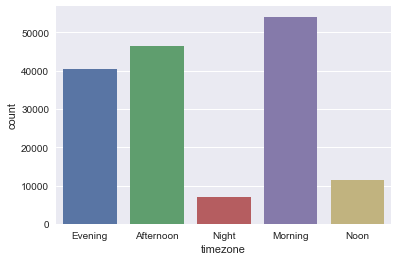

In [12]:
# emergency calls by time of the day, as can be seen most calls are during morning and least during night
sns.countplot('timezone', data = df)

In [13]:
# column for day of the week 
import datetime
def dayofweek(x):
    day = x.weekday()
    if day == 0:
        return 'Monday'
    elif day == 1:
        return 'Tuesday'
    elif day == 2:
        return 'Wednesday'
    elif day == 3:
        return 'Thursday'
    elif day == 4:
        return 'Friday'
    elif day == 5:
        return 'Saturday'
    elif day == 6:
        return 'Sunday'
df['dayofweek'] = df['datetime'].apply(lambda x : dayofweek(x))

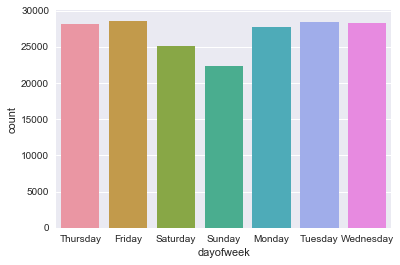

In [14]:
# emergency calls by day of week, as can be seen, Sunday has low frequency of calls
sns.countplot('dayofweek', data = df)

In [15]:
df['dayofweek'].value_counts()

Friday       28615
Tuesday      28377
Wednesday    28293
Thursday     28172
Monday       27751
Saturday     25146
Sunday       22397
Name: dayofweek, dtype: int64

In [16]:
df['twp'].nunique()

68

In [17]:
# from these places top 5 places from where 911 emergency calls originate are
df['twp'].value_counts().head(5)

LOWER MERION    16214
ABINGTON        11498
NORRISTOWN      10959
UPPER MERION     9827
CHELTENHAM       8641
Name: twp, dtype: int64

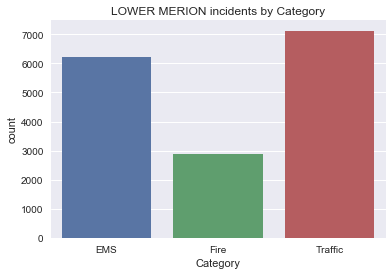

In [18]:
# Lower Merion seems to be with most emergencies
plt.title('LOWER MERION incidents by Category')
sns.countplot('Category', data = df[df['twp'] == 'LOWER MERION'])

In [19]:
# LOWER MERION seems to be most affected by traffic emergencies
df[(df['twp'] == 'LOWER MERION') & (df['Category'] == 'Traffic')]['Sub-Category'].value_counts()

 VEHICLE ACCIDENT -             4485
 DISABLED VEHICLE -             1466
 ROAD OBSTRUCTION -              778
 HAZARDOUS ROAD CONDITIONS -     294
 VEHICLE FIRE -                   91
 DEBRIS/FLUIDS ON HIGHWAY -        6
 VEHICLE LEAKING FUEL -            6
Name: Sub-Category, dtype: int64

In [20]:
# Cleaning data 
df['Sub-Category'] = df['Sub-Category'].apply(lambda x : ''.join(x.split('-')[0]))

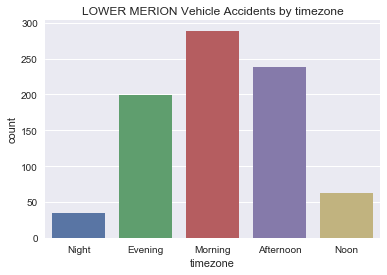

In [21]:
# Most common problem - vehical accidents
plt.title('LOWER MERION Vehicle Accidents by timezone')
sns.countplot('timezone', data = df[(df['twp'] == 'LOWER MERION') & (df['Sub-Category'] == ' VEHICLE ACCIDENT')])

# This shows vehicle accidents have occurred most in the morning and least in the night

In [22]:
# 5 places making lowest number of 911 calls
df['twp'].value_counts(ascending = True).head(5)

LEHIGH COUNTY     42
PHILA COUNTY      74
GREEN LANE       118
SALFORD          298
BRYN ATHYN       337
Name: twp, dtype: int64

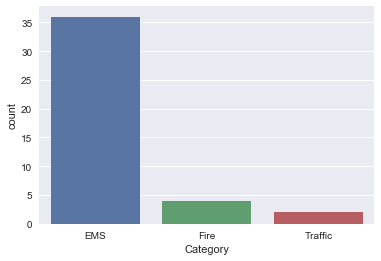

In [23]:
# LEHIGH COUNTY seems to be the least
# 
sns.countplot('Category', data = df[df['twp'] == 'LEHIGH COUNTY'])

In [24]:
# LEHIGH COUNTY has majority of emergencies as EMS
# Finding the number of emergencies under each sub-category
df[(df['twp'] == 'LEHIGH COUNTY') & (df['Category'] == 'EMS')]['Sub-Category'].value_counts()

 VEHICLE ACCIDENT             8
 FALL VICTIM                  3
 CVA/STROKE                   3
 RESPIRATORY EMERGENCY        3
 BACK PAINS/INJURY            2
 CARDIAC EMERGENCY            2
 LACERATIONS                  1
 SUBJECT IN PAIN              1
 CHOKING                      1
 UNKNOWN MEDICAL EMERGENCY    1
 FEVER                        1
 STABBING                     1
 DIZZINESS                    1
 HEAD INJURY                  1
 SYNCOPAL EPISODE             1
 UNCONSCIOUS SUBJECT          1
 HEMORRHAGING                 1
 ALLERGIC REACTION            1
 GENERAL WEAKNESS             1
 ELECTRICAL FIRE OUTSIDE      1
 ALTERED MENTAL STATUS        1
Name: Sub-Category, dtype: int64

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

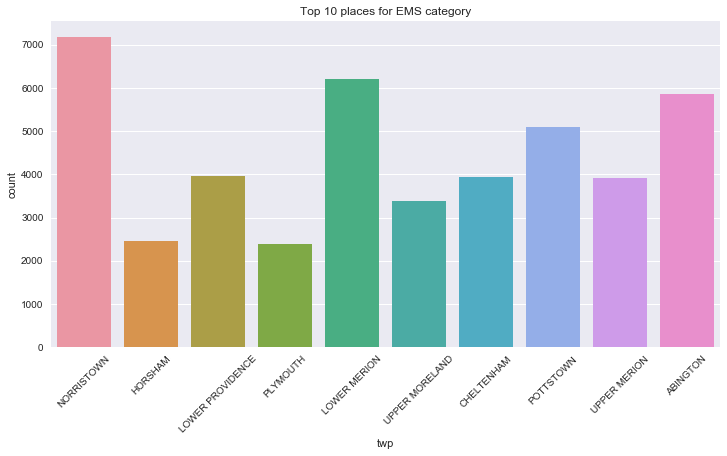

In [25]:
# top 10 places for EMS category
plt.figure(figsize = (12,6))
plt.title('Top 10 places for EMS category')
sns.countplot('twp', data = df[(df['Category'] == 'EMS') & (df['twp'].isin(['NORRISTOWN', 'LOWER MERION', 'ABINGTON',
                                                              'POTTSTOWN', 'LOWER PROVIDENCE', 'UPPER MERION', 
                                                              'CHELTENHAM', 'UPPER MORELAND', 'HORSHAM', 
                                                              'PLYMOUTH']))])
plt.xticks(rotation = 45)

In [26]:
#Top 10 places for Fire category
df[df['Category'] == 'Fire']['twp'].value_counts().head(10) 

LOWER MERION        2878
ABINGTON            1782
NORRISTOWN          1486
CHELTENHAM          1298
POTTSTOWN           1257
UPPER MERION        1184
WHITEMARSH           834
UPPER PROVIDENCE     831
LIMERICK             812
PLYMOUTH             752
Name: twp, dtype: int64

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

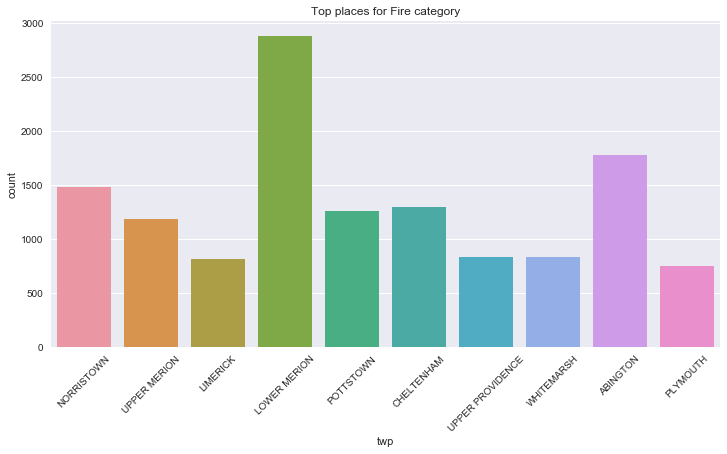

In [59]:
# top 10 places for Fire category
plt.figure(figsize = (12,6))
plt.title('Top places for Fire category')
sns.countplot('twp', data = df[(df['Category'] == 'Fire') 
                                    & (df['twp'].isin(['LOWER MERION', 
                                        'ABINGTON', 'NORRISTOWN', 
                                        'CHELTENHAM', 'POTTSTOWN', 'UPPER MERION', 
                                        'WHITEMARSH', 'UPPER PROVIDENCE', 
                                        'LIMERICK', 'PLYMOUTH']))])
plt.xticks(rotation = 45)

In [60]:
#Top 10 places with Traffic category
df[df['Category'] == 'Traffic']['twp'].value_counts().head(10) 

LOWER MERION      7126
UPPER MERION      4717
ABINGTON          3848
CHELTENHAM        3392
PLYMOUTH          2666
UPPER DUBLIN      2430
UPPER MORELAND    2417
HORSHAM           2368
MONTGOMERY        2348
NORRISTOWN        2288
Name: twp, dtype: int64

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

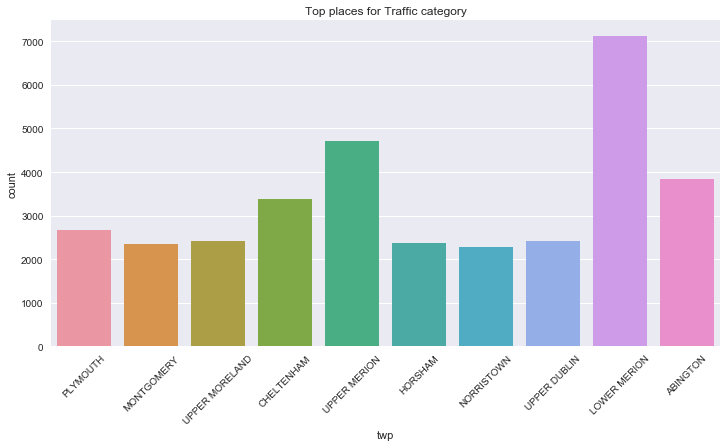

In [45]:
# top 10 places for Traffic category
plt.figure(figsize = (12,6))
plt.title('Top places for Traffic category')
sns.countplot('twp', data = df[(df['Category'] == 'Traffic') 
                                    & (df['twp'].isin(['LOWER MERION', 'UPPER MERION', 'ABINGTON', 
                                                            'CHELTENHAM', 'PLYMOUTH', 'UPPER DUBLIN', 
                                                            'UPPER MORELAND', 
                                                            'HORSHAM', 'MONTGOMERY', 'NORRISTOWN']))])
plt.xticks(rotation = 45)

## Norristown has high number of EMS, while low number of Fire and Traffic
## Lower Merion has almost similar count for all categories